# **Probability Basics**

In [4]:
# Importing required packages
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import integrate

sns.set_style('whitegrid')

In [ ]:
# Data Loading and Preprocessing
df_ = pd.read_csv('garments_worker_productivity.csv')
df = df_[['date', 'quarter', 'department', 'day', 'team']]
df = df[df['day'].isin(['Monday', 'Thursday', 'Saturday'])]
df = df[df['team'].isin([1, 2, 3])]
df = df[df['quarter'].isin(['Quarter1', 'Quarter2'])].reset_index(drop=True)
df['department'] = df['department'].apply(lambda x: x.replace(' ', ''))
df['department'] = df['department'].replace('sweing', 'sewing')

print("Dataset shape after cleaning:", df.shape)

Dataset shape after cleaning: (85, 5)


In [7]:
# Mutually Exclusive Events
finishing_and_sewing = np.logical_and(df['department']=='finishing', df['department']=='sewing')
P_mutual = finishing_and_sewing.sum() / len(df)
print("P(finishing and sewing simultaneously):", P_mutual)

P(finishing and sewing simultaneously): 0.0


In [9]:
# Dependent Events — Conditional Probabilities
# Case 1: Selecting 'finishing' then 'sewing'
df_finishing = df[df['department']=='finishing']
i = np.random.randint(len(df_finishing)-1)
df_new = df.drop(df_finishing.iloc[i:i+1, :].index)
df_sewing = df_new[df_new['department']=='sewing']
P_case1 = (len(df_finishing)/len(df)) * (len(df_sewing)/len(df_new))

# Case 2: Selecting 'non-finishing' then 'sewing'
df_non_finishing = df[df['department']!='finishing']
i = np.random.randint(len(df_non_finishing)-1)
df_new = df.drop(df_non_finishing.iloc[i:i+1, :].index)
df_sewing = df_new[df_new['department']=='sewing']
P_case2 = (len(df_non_finishing)/len(df)) * (len(df_sewing)/len(df_new))

In [10]:
# Independent Events — Monday and Saturday
P_monday = len(df[(df['day']=='Monday') & (df['department']=='finishing')]) / len(df[df['day']=='Monday'])
P_saturday = len(df[(df['day']=='Saturday') & (df['department']=='sewing')]) / len(df[df['day']=='Saturday'])
P_independent = P_monday * P_saturday
print("P(finishing on Monday AND sewing on Saturday):", round(P_independent, 4))

P(finishing on Monday AND sewing on Saturday): 0.2704


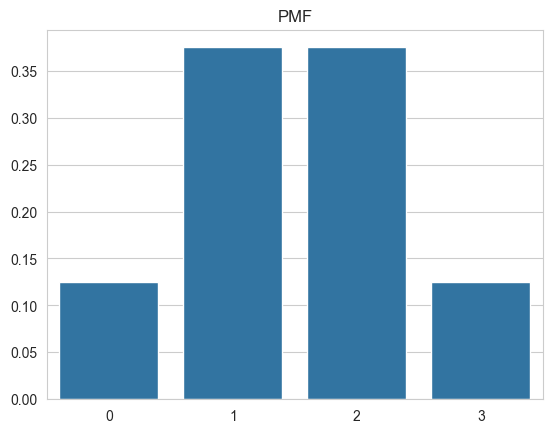

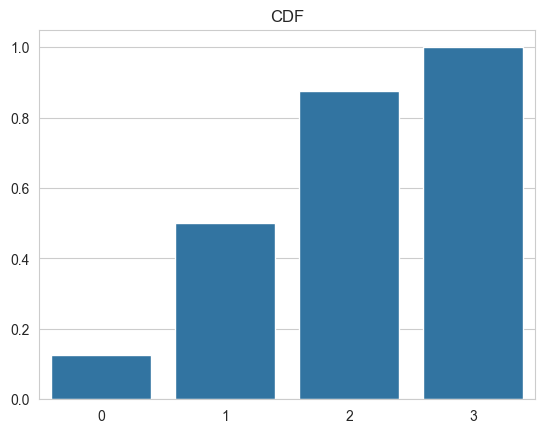

In [11]:
# Discrete Distribution — PMF & CDF
X = [0,1,2,3]
P_Xi = [1/8, 3/8, 3/8, 1/8]
sns.barplot(x=X, y=P_Xi)
plt.title('PMF'); plt.show()
sns.barplot(x=X, y=np.cumsum(P_Xi))
plt.title('CDF'); plt.show()

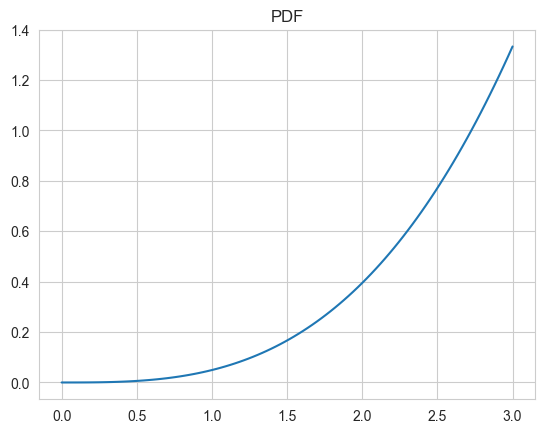

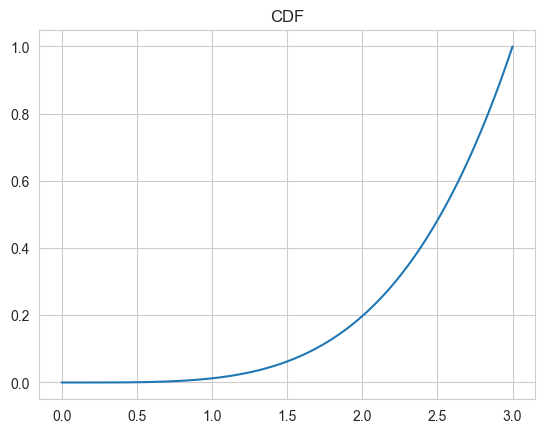

In [12]:
# Continuous Distribution — PDF & CDF
k = 1 / integrate.quad(lambda x: x**3, 0, 3)[0]
x_vals = np.linspace(0, 3, 100)
pdf = k * x_vals**3
cdf = [integrate.quad(lambda u: k*u**3, 0, v)[0] for v in x_vals]

sns.lineplot(x=x_vals, y=pdf)
plt.title("PDF"); plt.show()
sns.lineplot(x=x_vals, y=cdf)
plt.title("CDF"); plt.show()

In [13]:
# Manual Integration with Riemann Sum
def f(x): return x**3 if 0 <= x <= 3 else 0
def compute_k():
    dx = 0.001
    return 1 / sum(f(x)*dx for x in np.arange(0,3,dx))

k_manual = compute_k()
P_1_to_2 = sum(k_manual*f(x)*0.001 for x in np.arange(1,2,0.001))
print("P(1 < X < 2):", round(P_1_to_2, 4))

P(1 < X < 2): 0.1851
